In [41]:
# Execute if necessary
# %%capture
# !pip install numpy seaborn

In [42]:
#pip install statsmodels

In [43]:
import numpy as np
import seaborn as sns
from typing import List
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Práctica 5: Introducción a  Modelos Autoregresivos y de Medias Móviles

__Instrucciones__: A continuación hay una lista de funciones que debe implementar o tareas que debe desarrollar. La descripción de cada una de ellas se encuentra en la definición de cada una de las funciones.

La entrega de la práctica será en la siguiente sesión a menos que la indicación sea otra. La revisión iniciará al iniciar la sesión y únicamente podrá ser evaluada durante la duración de la sesión.

## Asignación 1

Implementa la función descrita debajo para simular el proceso autoregresivo dado por

$$
X_t = \phi_1 X_{t-1} + \phi_2 X_{t-2} + \cdots + \phi_p X_{t-p} + W_t
$$

In [44]:
import numpy as np
from typing import List

def simulate_auto_regressive_process(
    parameters: List[float]=[0.9], 
    timesteps: int=100, 
    mean: float=0.,
    std: float=1.
):
    '''
    This function simulates an AR(p) process with mean 0.
    
    Inputs:
        parameters: A list of the parameters phi used to compute the autoregression simulation.
                    The first parameter is associated with the time t-1, the second with t-2 and so on.
        timesteps: The number of timesteps to simulate. The first p values of the simulation must 
                    be set to zero (initial conditions).
        mean: The mean used to sample the white noise
        std: The standard deviation used to sample the white noise
    Output:
        The time series simulation
    '''
    
    p = len(parameters) # order of the autoregressive process
    ar = np.zeros(timesteps) # initialize the process with zeros
    noise = np.random.normal(mean, std, size=timesteps) # generate the white noise
    
 
    # simula el proceso autorregresivo
    for t in range(p, timesteps):
        ar[t] = mean # inicializa el valor en el tiempo t con la media
        for i in range(p):
            ar[t] += parameters[i] * ar[t-i-1] # actualiza el valor en el tiempo t usando valores pasados
        ar[t] += noise[t] # agregando el ruido blanco
    
    return ar


Un proceso autoregresivo (AR, por sus siglas en inglés) es un modelo estadístico utilizado para modelar series de tiempo. En un modelo AR, el valor actual de la serie de tiempo depende de sus valores anteriores. La idea básica detrás de un modelo AR es que el valor actual de la serie de tiempo es una combinación lineal de sus valores pasados, más un término de ruido.

La notación AR(p) se utiliza para describir un proceso autoregresivo de orden p. Un proceso AR(p) se puede escribir como:

$ Y_t = c + phi_1 * Y_{t-1} + phi_2 * Y_{t-2} + ... + phi_p * Y_{t-p} + e_t $ 


donde Y_t es el valor de la serie de tiempo en el tiempo t, c es una constante, phi_1 a phi_p son los parámetros autoregresivos que definen la relación entre los valores pasados y actuales de la serie de tiempo, e_t es el término de ruido en el tiempo t, y p es el orden del proceso autoregresivo.


Los coeficientes phi_i determinan la fuerza y el signo de la relación entre los valores pasados y actuales de la serie de tiempo. Un coeficiente phi_i positivo indica una correlación positiva entre los valores pasados y actuales de la serie de tiempo, mientras que un coeficiente phi_i negativo indica una correlación negativa. Un coeficiente phi_i igual a cero indica que el valor de la serie de tiempo en el tiempo t no depende del valor de la serie de tiempo en el tiempo t-i.

En resumen, un proceso autoregresivo es un modelo estadístico que describe la dependencia de una serie de tiempo en sus valores pasados, lo que permite predecir valores futuros en función de los valores pasados y actuales de la serie de tiempo.

## Asignación 2

Grafique la simulación de la serie de tiempo del modelo autoregresivo con los parámetros indicados por el profesor. A la derecha de la serie de tiempo debe graficar el correlograma para el proceso simulado.

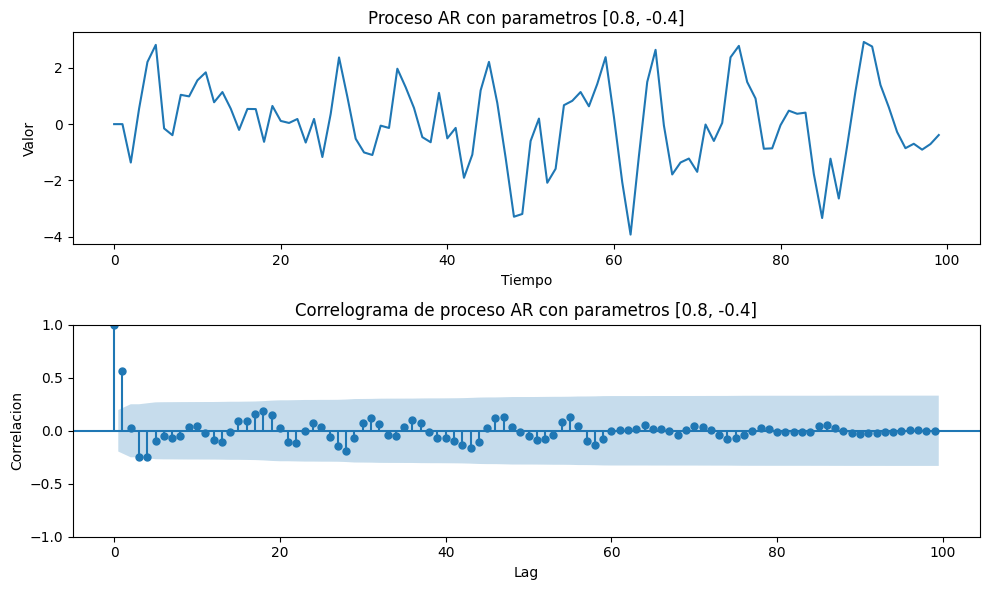

In [45]:
# Parameters
phi = [0.8, -0.4]
timesteps = 100
mean = 0.
std = 1.


# Simular el proceso AR
ar = simulate_auto_regressive_process(phi, timesteps, mean, std)

# Gráfica del proceso AR y su correlograma
fig, ax = plt.subplots(2, 1, figsize=(10, 6))


# Gráfica del proceso AR
ax[0].plot(ar)
ax[0].set_title('Proceso AR con parametros ' + str(phi))
ax[0].set_xlabel('Tiempo')
ax[0].set_ylabel('Valor')


# Gráfica del correlograma del proceso AR
plot_acf(ar, ax=ax[1], lags=timesteps-1)
ax[1].set_title('Correlograma de proceso AR con parametros ' + str(phi))
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('Correlacion')

plt.tight_layout()
plt.show()

Un correlograma es una gráfica que muestra los coeficientes de correlación entre los valores de una serie de tiempo y sus valores desplazados en el tiempo (también conocidos como lags). En otras palabras, un correlograma es una visualización de la autocorrelación de una serie de tiempo.

La autocorrelación mide el grado de similitud entre una serie de tiempo y una versión desplazada en el tiempo de sí misma. Si una serie de tiempo tiene una autocorrelación alta para un lag determinado, significa que los valores en ese lag están relacionados y tienden a seguir un patrón similar. Por lo tanto, el correlograma puede ayudar a identificar patrones repetitivos en la serie de tiempo.

En el correlograma, el eje x representa el lag y el eje y representa el coeficiente de correlación. El coeficiente de correlación varía entre -1 y 1, donde -1 indica una correlación negativa perfecta, 0 indica no correlación, y 1 indica una correlación positiva perfecta. Los puntos en el correlograma indican el valor del coeficiente de correlación para cada lag.

## Asignación 3

Implementa la función descrita debajo para simular el proceso de medias móviles dado 

$$
X_t = W_t + \theta_1 W_{t-1} + \theta_2 W_{t-2} + \cdots + \theta_q W_{t-q}
$$

In [46]:
def simulate_moving_averages_process(
    parameters: List[float]=[0.9], 
    timesteps: int=100, 
    mean: float=0.,
    std: float=1.
    ):
    
    '''
    This function simulates an MA(q) process with mean 0.
    
    Inputs:
        parameters: A list of the parameters theta used to compute the moving averages simulation
        timesteps: The number of timesteps to simulate.
        mean: The mean used to sample the white noise
        std: The standard deviation used to sample the white noise
    Output:
        The time series simulation
    '''
    
    return np.zeros(timesteps)

In [47]:
import numpy as np
from typing import List

def simulate_moving_averages_process(
    parameters: List[float]=[0.9], 
    timesteps: int=100, 
    mean: float=0.,
    std: float=1.
):
    '''
    This function simulates an MA(q) process with mean 0.
    
    Inputs:
        parameters: A list of the parameters theta used to compute the moving averages simulation
        timesteps: The number of timesteps to simulate.
        mean: The mean used to sample the white noise
        std: The standard deviation used to sample the white noise
    Output:
        The time series simulation
    '''
    
    q = len(parameters) # orden del proceso de medias móviles
    ma = np.zeros(timesteps) # inicializa el proceso con ceros
    noise = np.random.normal(mean, std, size=timesteps) # genera el ruido blanco
    

    # simular el proceso de medias móviles
    for t in range(q, timesteps):
        ma[t] = mean # inicializa el valor en el tiempo t con la media
        for i in range(q):
            ma[t] += parameters[i] * noise[t-i-1] # actualiza el valor en el tiempo t usando ruido pasado
           
    return ma


In [48]:
ma = simulate_moving_averages_process()
ma

array([ 0.00000000e+00, -1.32514428e+00, -1.27209426e+00,  1.12561794e+00,
        5.20775349e-01, -1.36368016e+00,  7.40499460e-01, -2.89035794e-01,
        6.71201218e-01,  1.54636047e+00,  1.77824136e+00,  1.05358306e-03,
       -6.21416692e-01,  1.08703593e+00,  1.37851521e-01, -5.74351500e-01,
       -2.16473360e-01,  1.06006746e-01, -1.58521026e+00, -1.64178946e-01,
       -2.53817433e-01,  1.36850844e+00, -1.33820977e+00, -6.26965990e-01,
       -1.48844960e-01,  8.07852662e-01, -8.13153815e-01, -3.67949555e-01,
       -1.52325625e-01,  1.31623028e+00,  8.45607395e-02, -1.01354337e+00,
        5.18309286e-01,  8.51415375e-01,  8.64290625e-01,  9.99929772e-01,
       -1.36677254e-01,  5.70197177e-01,  1.31078268e+00,  6.47627535e-01,
        9.27725031e-01, -3.13846289e-01, -4.70288960e-01, -1.34969086e-01,
       -9.47007867e-01, -1.03514722e-01,  1.62205334e-01, -9.39304351e-01,
       -1.70129146e+00, -4.93793456e-01,  7.26061557e-01,  1.36379038e-01,
       -1.95010916e+00,  

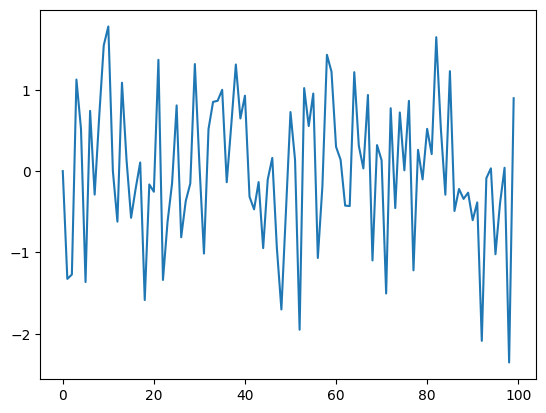

In [49]:
# graficar el proceso de medias móviles
plt.plot(ma)

